## 05-02 回帰

In [1]:
%matplotlib inline

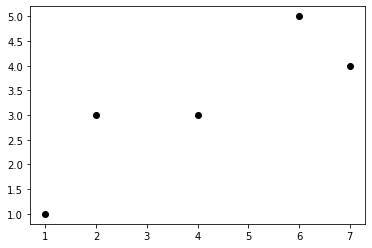

In [2]:
import matplotlib.pyplot as plt

x=[1,2,4,6,7]
y=[1,3,3,5,4]

plt.scatter(x,y,color='k')
plt.show()

### 原点を通る直線による近似
最小二乗法：  
直線で近似したときの誤差の２乗の和を考え、それを最小化しようとする.つまり、次の$E$を最小化する.
$$
E=\sum_{i=1}^n (ax_i-y_i)^2
$$
これを最小化するには、$E$を$a$の関数だとみなして$a$で微分した関数が0になる条件を考える.
$$
\begin{eqnarray}
\frac{\partial E}{\partial a}&=&\sum 2x_i(ax_i-y_i)\\
&=&2\left\{a\sum x_i^2-\sum x_i y_i\right\}=0\\
\therefore \ a&=&\frac{\sum x_iy_i}{x_i^2}=\frac{\boldsymbol{x}^T \boldsymbol{y}}{||\boldsymbol{x}||^2}
\end{eqnarray}
$$

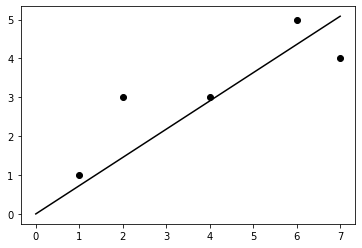

In [3]:
# 原点を通る直線による近似
import numpy as np
import matplotlib.pyplot as plt


def reg1dim1(x,y):
    a=np.dot(x,y)/(x**2).sum()
    return a


x=np.array([1,2,4,6,7])
y=np.array([1,3,3,5,4])
a=reg1dim1(x,y)

plt.scatter(x,y,color='k')
xmax=x.max()
plt.plot([0,xmax],[0,a*xmax],color='k')
plt.show()

### 一般の直線による近似
よりよく近似するために原点を通るという制約をなくし、直線$y=ax+b$で近似する.  
2乗誤差の和は次のようになる.
$$
E=\sum_{i=1}^n(ax_i+b-y_i)^2
$$
ここで同様に、$E$を$a$,$b$の関数$E(a,b)$だと思って、$\nabla E=0$とする.  
つまり$\frac{\partial E}{\partial a}=0$、$\frac{\partial E}{\partial b}=0$という$a$,$b$についての連立方程式を解く.
$$
\frac{\partial E}{\partial a}=0
$$
より
$$
\sum_{i=1}^nx_i(ax_i+b-y_i)=0\hspace{30pt}式05-02
$$
また、
$$
\frac{\partial E}{\partial b}=0
$$
より
$$
\begin{align}
&\sum_{i=1}^n(ax_i+b-y_i)=\sum_{i=1}^n ax_i+\sum_{i=1}^n b-\sum_{i=1}^n y_i=0\\
&\therefore \hspace{15pt}b=\frac{1}{n}\sum_{i=1}^n(y_i-ax_i)
\end{align}
\hspace{30pt}式05-03
$$
となる.これを式05-12の左辺に代入して次を得る.
$$
\begin{eqnarray}
\sum_{i=1}^n x_i(ax_i+b-y_i)&=&a\sum_{i=1}^n x_i^2+b\sum_{i=1}^n x_i-\sum_{i=1}^n x_iy_i\\
&=&a\sum_{i=1}^n x_i^2+\frac{1}{n}\sum_{i=1}^n (y_i-ax_i)\cdot \sum_{i=1}^n x_i-\sum_{i=1}^n x_iy_i\\
&=&a\sum_{i=1}^n x_i^2+\frac{1}{n}\sum_{i=1}^n x_i\sum_{i=1}^n y_i-\frac{a}{n}\sum_{i=1}^n x_i\sum_{i=1}^n x_i-\sum_{i=1}^n x_iy_i\\
&=&a\left[\sum_{i=1}^n x_i^2-\frac{1}{n}\left(\sum_{i=1}^n x_i\right)^2\right]+\frac{1}{n}\sum_{i=1}^n x_i\sum_{i=1}^n y_i-\sum_{i=1}^n x_iy_i
\end{eqnarray}
$$
これが$=0$なので、$a$について解くと次のようになる.
$$
a=\frac{\sum_{i=1}^n x_i y_i-\frac{1}{n}\sum_{i=1}^n x_i \sum_{i=1}^n y_i}{\sum_{i=1}^n x_i^2-\frac{1}{n}\left(\sum_{i=1}^n x_i\right)^2}
$$

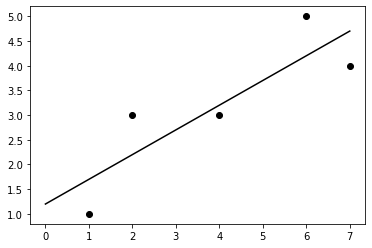

In [4]:
# 一般の直線による近似
import numpy as np
import matplotlib.pyplot as plt


def reg1dim2(x,y):
    n=len(x)
    a=((np.dot(x,y)-y.sum()*x.sum()/n))/((x**2).sum()-x.sum()**2/n)
    b=(y.sum()-a*x.sum())/n
    return a,b


x=np.array([1,2,4,6,7])
y=np.array([1,3,3,5,4])
a,b=reg1dim2(x,y)

plt.scatter(x,y,color='k')
xmax=x.max()
plt.plot([0,xmax],[b,a*xmax+b],color='k')
plt.show()

### 特徴量ベクトルが多次元の場合
一般次元の場合の線形回帰モデルは次のような式で表される
$$
y=w_0+w_1x_1+w_2x_2+\cdots+w_dx_d+\epsilon
$$
ここで、$(x_0,\cdots,x_d)^T$は入力変数、$w_0,w_1,\cdots,w_d$はパラメータ、$y$はターゲット、$\epsilon$はノイズを示す.特に$d=1$のときは前述の１次元のケースに相当し、$w_0$が$b$に$w_1$が$a$に対応する.ベクトル$\boldsymbol{x}=(x_1,x_2,\cdots,x_d)^T$に対して要素１を付加したベクトル$\boldsymbol{\tilde x}$を考え、ベクトル$\boldsymbol w=(w_0,w_1,\cdots ,w_d)^T$と定義すると次のように表せる.
$$
\boldsymbol{\hat y}(\boldsymbol w)=\boldsymbol{\tilde X}\boldsymbol w
$$
この当てはめと、ターゲット$y$との差の２乗の和$||\boldsymbol{y}-\boldsymbol{\hat y}(\boldsymbol w)||^2$を最小化することを考える.つまり次の値を最小化するような$w$を求める.
$$
\begin{eqnarray}
E(\boldsymbol w)&=&||\boldsymbol{y}-\boldsymbol{\tilde Xw}||^2\\
&=&(\boldsymbol{y}-\boldsymbol{\tilde Xw})^T(\boldsymbol{y}-\boldsymbol{\tilde Xw})\\
&=&\boldsymbol{y}^T \boldsymbol{y}-\boldsymbol{w}^T \boldsymbol{\tilde X}^T\boldsymbol{y}-\boldsymbol{y}^T\boldsymbol{\tilde X}\boldsymbol{w}+\boldsymbol{w}^T\boldsymbol{\tilde X}^T\boldsymbol{\tilde X}\boldsymbol{w}
\end{eqnarray}
$$
これの勾配を計算する.
$$
\nabla E(\boldsymbol w)=-2\boldsymbol{\tilde X}^T\boldsymbol{y}+2\boldsymbol{\tilde X}^T\boldsymbol{\tilde X}\boldsymbol{w}
$$
これを$=0$とおくことで、最小化する$w$が求められる.
$$
\begin{eqnarray}
\nabla E(\boldsymbol{w})&=&-2\boldsymbol{\tilde X}^T\boldsymbol{y}+2\boldsymbol{\tilde X}^T\boldsymbol{\tilde X}\boldsymbol{w}\\
\boldsymbol{w}&=&(\boldsymbol{\tilde X}^T\boldsymbol{\tilde X})^{-1}\boldsymbol{\tilde X}^T\boldsymbol{y}
\end{eqnarray}
$$

In [25]:
import numpy as np
from scipy import linalg
from icecream import ic


class LinearRegression:
    def __init__(self):
        self.w_=None


    def fit(self,X,t):
        Xtil=np.c_[np.ones(X.shape[0]),X]
        A=np.dot(Xtil.T,Xtil)
        b=np.dot(Xtil.T,t)
        self.w_=linalg.solve(A,b)   # Ax=bの解xを求める


    def predict(self,X):
        if X.ndim==1:
            X=X.reshape(1,-1)
        Xtil=np.c_[np.ones(X.shape[0]),X]
        return np.dot(Xtil,self.w_)

係数: [1.11450326 1.95737004 3.00295751]
(1,1)に対する予測値: [6.07483081]


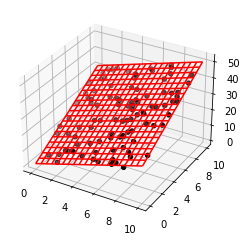

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


n=100
scale=10
np.random.seed(0)
X=np.random.random((n,2))*scale
w0=1
w1=2
w2=3
y=w0+w1*X[:,0]+w2*X[:,1]+np.random.randn(n)

model=LinearRegression()
model.fit(X,y)
print('係数:',model.w_)
print('(1,1)に対する予測値:',model.predict(np.array([1,1])))

xmesh,ymesh=np.meshgrid(
    np.linspace(0,scale,20),
    np.linspace(0,scale,20))

zmesh=(model.w_[0]+model.w_[1]*xmesh.ravel()+model.w_[2]*ymesh.ravel()).reshape(xmesh.shape)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],y,color='k')
ax.plot_wireframe(xmesh,ymesh,zmesh,color='r')
plt.show()

### 実践的な例
ワインについて測定された数値から品質を予測するモデルを作って実験する.

In [7]:
import numpy as np
import pandas as pd


# データ読み込み
df=pd.read_csv('winequality-red.csv',delimiter=';')
# print(df)
Xy=df.values.astype('float64')

# 訓練用データとテスト用データに分割する
np.random.seed(0)
np.random.shuffle(Xy)
train_X=Xy[:-1000,:-1]
train_y=Xy[:-1000,-1]
test_X=Xy[-1000:,:-1]
test_y=Xy[-1000:,-1]

# 学習させる
model=LinearRegression()
model.fit(train_X,train_y)

# テスト用データにモデルを適用
y=model.predict(test_X)

print('最初の５つの正解と予測値:')
for i in range(5):
    print('{:1.0f} {:5.3f}'.format(test_y[i],y[i]))
print()
print('RMSE:',np.sqrt(((test_y-y)**2).mean()))  # RMSE(平均２乗誤差のルート)を表示

最初の５つの正解と予測値:
7 6.012
6 5.734
5 5.285
8 6.352
5 5.414

RMSE: 0.6724248548471087


予測の評価ではRMSE（平均２乗誤差のルート、Root of Mean Square Error）がよく使われる.RMSEは予測値$\boldsymbol{\hat{y}}=(\hat{y}_1,\hat{y}_2,\cdots ,\hat{y}_n)$と正解値（出力訓練データ）$\boldsymbol{y}=(y_1,y_2,\cdots ,y_n)$について
$$
\sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y}_i-y_i)^2}=\frac{||\boldsymbol{\hat{y}}-\boldsymbol{y}||}{\sqrt{n}}
$$
で与えられる.
RMSEのような指標値は、他のモデルと比べてどのくらいよいかという評価に使うのが普通.

### 機械学習アルゴリズムの評価について
ホールド・アウト検証：  
データを訓練用と評価用に分け、訓練用データで学習し、評価用データをうまく予測できているかを評価する手法

## 05-03 リッジ回帰
線形回帰で最小化する目的関数に、パラメータの大きさの項を足したのがリッジ回帰.つまりリッジ回帰では次の関数を最小化するような$w$を決定する.
$$
E(\boldsymbol{w})=||\boldsymbol{y-\boldsymbol{\tilde Xw}}||^2+\lambda||w||^2
$$
$\lambda||w||^2$の項（正則化項）が加わったことにより、点群を線形に近似しつつも、できるだけ$w$の大きさ（L2ノルム）が小さい方がよいという力が働く.ここで$\lambda$は$w$の大きさをどのくらい重視するかを表す定数でハイパーパラメータと呼ばれる.線形回帰のときと同様に$w$についての勾配をとって$=0$とおく.
$$
\begin{eqnarray}
\nabla E&=&2\boldsymbol{\tilde X}^T\boldsymbol{\tilde Xw}-2\boldsymbol{\tilde X}^T\boldsymbol{y}+2\lambda \boldsymbol{w}\\
&=&2\left[(\boldsymbol{\tilde X}^T\boldsymbol{\tilde X}+\lambda\boldsymbol{I})\boldsymbol{w}-\boldsymbol{\tilde X}^T\boldsymbol{y}\right]=0
\end{eqnarray}
$$
よって
$$
\boldsymbol{w}=(\boldsymbol{\tilde X}^T\boldsymbol{\tilde X}+\lambda\boldsymbol{I})^{-1}\boldsymbol{\tilde X}^T\boldsymbol{y}
$$

In [8]:
import numpy as np
from scipy import linalg


class RidgeRegression:
    def __init__(self,lambda_=1.):
        self.lambda_=lambda_
        self.w_=None


    def fit(self,X,t):
        Xtil=np.c_[np.ones(X.shape[0]),X]
        c=np.eye(Xtil.shape[1])
        A=np.dot(Xtil.T,Xtil)+self.lambda_*c
        b=np.dot(Xtil.T,t)
        self.w_=linalg.solve(A,b)


    def predict(self,X):
        Xtil=np.c_[np.ones(X.shape[0]),X]
        return np.dot(Xtil,self.w_)

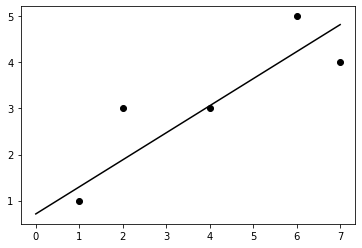

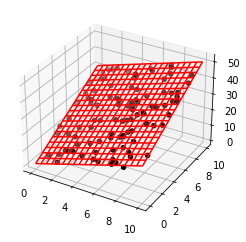

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from icecream import ic


x=np.array([1,2,4,6,7])
y=np.array([1,3,3,5,4])
model=RidgeRegression(1.)
model.fit(x,y)
# ic(model.w_)
b,a=model.w_    # b:切片,a:傾き

plt.scatter(x,y,color='k')
xmax=x.max()
plt.plot([0,xmax],[b,b+a*xmax],color='k')
plt.show()


n=100
scale=10

np.random.seed(0)
X=np.random.random((n,2))*scale
# ic(X)
w0=1
w1=2
w2=3
y=w0+w1*X[:,0]+w2*X[:,1]+np.random.randn(n)

model=RidgeRegression(1.)
model.fit(X,y)

xmesh,ymesh=np.meshgrid(np.linspace(0,scale,20),np.linspace(0,scale,20))
zmesh=(model.w_[0]+model.w_[1]*xmesh.ravel()+model.w_[2]*ymesh.ravel()).reshape(xmesh.shape)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],y,color='k')
ax.plot_wireframe(xmesh,ymesh,zmesh,color='r')
plt.show()

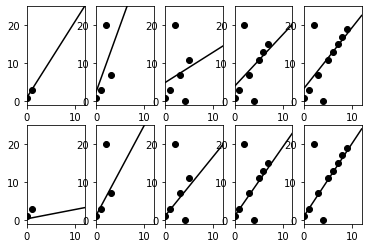

In [10]:
import numpy as np
import matplotlib.pyplot as plt


x=np.arange(12)
y=1+2*x
y[2]=20 # 二つのデータだけ外れ値とする
y[4]=0

xmin=0
xmax=12
ymin=-1
ymax=25
fig,axes=plt.subplots(nrows=2,ncols=5)
for i in range(5):
    axes[0,i].set_xlim([xmin,xmax])
    axes[0,i].set_ylim([ymin,ymax])
    axes[1,i].set_xlim([xmin,xmax])
    axes[1,i].set_ylim([ymin,ymax])
    xx=x[:2+i*2]    #初期データを二つとして、二つずつ増やしていく
    yy=y[:2+i*2]
    axes[0,i].scatter(xx,yy,color='k')
    axes[1,i].scatter(xx,yy,color='k')
    model=LinearRegression()    # 通常の線形回帰
    model.fit(xx,yy)
    xs=[xmin,xmax]
    ys=[model.w_[0]+model.w_[1]*xmin,model.w_[0]+model.w_[1]*xmax]  # 回帰直線
    axes[0,i].plot(xs,ys,color='k')
    model=RidgeRegression(10.)  # リッジ回帰
    model.fit(xx,yy)
    xs=[xmin,xmax]
    ys=[model.w_[0]+model.w_[1]*xmin,model.w_[0]+model.w_[1]*xmax]  # 回帰直線
    axes[1,i].plot(xs,ys,color='k')

plt.show()

リッジ回帰ではサンプル数が少ないときに例外的なデータからの影響を受けにくいという性質がある.これは正則化による効果.

### ハイパーパラメータとチューニング
ハイパーパラメータ：  
モデルが学習を始める前にあらかじめ値を決めるべきもの.ハイパーパラメータは学習の前に一度決めたらずっとそのまま変化しない値.また、学習過程で変化していくモデルのパラメータがどのように変化していくかを決定するのがハイパーパラメータ.ハイパーパラメータの決定のしかたとしては、いくつかの値を試してみて一番良い結果ができるものを選択することが多い.

### 05-04 汎化と過学習
多項式回帰：  
入力変数$x$に対して出力$y$が$x$の多項式関数で表されるというモデルのこと  
入力$x$が１次元と仮定し、多項式の次数が$d$で与えられているとした場合、次のようなモデルになる.
$$
y=w_0+w_1x+w_2x^2+\cdots+w_dx^d+\epsilon\hspace{30pt}式05-06
$$
ここで$\epsilon$はノイズを表す.このとき線形回帰のときと同様に、最小二乗法により係数を決定する.$w$と$x$が与えられたときの、予測値
$$
\hat{t}=w_0+w_1x+\cdots+w_dx^d
$$
を$x$と$ｗ$の関数$\hat{y}(x,w)$とみなして、訓練データの特徴量$x$とターゲット$y$に対して次を計算することになる
$$
\min_w||\hat{y}(x,w)-y||^2\hspace{30pt}式05-07
$$
式05-07の最適化問題は、与えられた訓練データの特徴量$(x_1,x_2,\cdots,x_n)^T$について、各要素の0次（つまり１）からd次のベキまでを並べた行列
$$
M=
\left(
\begin{array}{c}
1&x_1&x_1^2&\cdots &x_1^d\\
1&x_2&x_2^2&\cdots &x_2^d\\
\vdots &\vdots &\ddots &\ \\
1&x_n&x_n^2& \cdots &x_n^d
\end{array}
\right)
$$
を訓練データの特徴量行列として線形回帰を計算した場合とおなじになる.実際$x_i$に対する予想値を$\hat{y}_i$とし、$\boldsymbol{\hat{y}}=(y_1,y_2,\cdots,y_n)$とすると、次のようになる.
$$
\boldsymbol{\hat{y}}=
\left(
\begin{array}{c}
w_0+w_1x_1+w_2x_1^2+\cdots+w_dx_1^d\\
w_0+w_1x_2+w_2x_2^2+\cdots+w_dx_2^d\\
\vdots\\
w_0+w_1x_n+w_2x_n^2+\cdots+w_dx_n^d\\
\end{array}
\right)
=
\left(
\begin{array}{c}
1&x_1&x_1^2&\cdots&x_1^d\\
1&x_2&x_2^2&\cdots&x_2^d\\
\vdots&\vdots&\ddots&\vdots&\ \\
1&x_n&x_n^2&\cdots&x_n^d\\
\end{array}
\right)
\left(
\begin{array}{c}
w_0\\
w_1\\
\vdots\\
w_d\\
\end{array}
\right)
=\boldsymbol{Mw}
$$

In [15]:
import numpy as np
from icecream import ic


class PolynomialRegression:
    def __init__(self,degree):  #degree:何次関数で近似するか
        self.degree=degree


    def fit(self,x,y):
        x_pow=[]
        xx=x.reshape(len(x),1)
        # ic(xx)
        for i in range(1,self.degree+1):
            x_pow.append(xx**i)
        mat=np.concatenate(x_pow,axis=1)
        # ic(mat)
        linreg=LinearRegression()
        linreg.fit(mat,y)
        self.w_=linreg.w_


    def predict(self,x):
        r=0
        for i in range(self.degree+1):
            r+=x**i*self.w_[i]
        return r

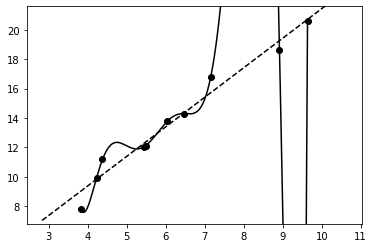

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#データ生成
np.random.seed(0)


def f(x):
    return 2*x+1


x=np.random.random(10)*10
y=f(x)+np.random.randn(10)

#多項式回帰
model=PolynomialRegression(10)  #10次関数で近似
model.fit(x,y)

plt.scatter(x,y,color='k')
plt.ylim([y.min()-1,y.max()+1])
xx=np.linspace(x.min(),x.max(),300)
yy=np.array([model.predict(u) for u in xx])
plt.plot(xx,yy,color='k')

#線形回帰
model=LinearRegression()
model.fit(x,y)
b,a=model.w_
x1=x.min()-1
x2=x.max()+1
plt.plot([x1,x2],[a*x1+b,a*x2+b],color='k',linestyle='--')

plt.show()

与えられた訓練データを完璧に正しく予想できるように学習したモデルが良いとは限らない.  
機械学習システムを利用する目的は、未知のデータに対して予測ができるようになること.  
未知のデータをどのくらい予測できるかという性能を汎化性能と呼ぶ.

### モデルの汎化性能
真の値$f(x)$に対して、データ$D$を使って予測した値を$\hat{f}_D(x)$で表すとする.データの集合$\mathcal{D}$が与えられたときに2乗誤差の平均は次のようになる.
$$
E_{\mathcal D}\left[\left(f(x)-\hat{f}_D(x)\right)^2\right]=\left(f(x)-E_{\mathcal D}\left[\hat{f}_D(x)\right]\right)^2
+E_{\mathcal D}\left[\left(\hat{f}_D(x)-E_{\mathcal D}\left[\hat{f}_D(x)\right]\right)^2\right]
$$
ここで$E_{\mathcal D}$は考えられる入力データ$D \in \mathcal D$すべてについての平均である.第１項の$\left(f(x)-E_D\left[\hat{f}_D(x)\right]\right)^2$はバイアスと呼ばれる.式の形を見ると、全てのデータについての予測値の平均と真の値との差の２乗になっている.つまり、真の値が変わらない前提で観測データが変化していったときに、$x$における予測値の平均をとったものと、真の値の差がどのくらいあるかを意味する.  
第２項はバリアンスと呼ばれ、式を見ると$D$が変化したときの予測値$\hat{f}_D(x)$の分散になっている.  
つまりまとめると、
  
予測誤差の平均＝バイアス＋バリアンス  
  
という関係が成り立つ.バイアスは観測データが変わったときに平均的にどのくらい予想できるかという値であり、バリアンスはデータが変わったときにどのくらい予想値がばらつくかという値.  

つぎのような関数が与えられたとして、この値を線形回帰と多項式回帰を予想することを考える.
$$
y=\frac{1}{1+x}\hspace{15pt}(0\leq x\leq 5)
$$

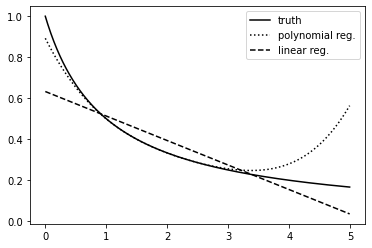

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import warnings


def f(x):
    return 1/(1+x)


def sample(n):
    x=np.random.random(n)*5
    y=f(x)
    return x,y


xx=np.arange(0,5,0.01)
np.random.seed(0)
y_poly_sum=np.zeros(len(xx))
y_lin_sum=np.zeros(len(xx))
n=1000
warnings.filterwarnings('ignore')
for _ in range(n):
    x,y=sample(5)
    poly=PolynomialRegression(4)
    poly.fit(x,y)
    lin=LinearRegression()
    lin.fit(x,y)
    y_poly=poly.predict(xx)
    y_poly_sum+=y_poly
    y_lin=lin.predict(xx.reshape(-1,1))
    y_lin_sum+=y_lin


plt.plot(xx,f(xx),label='truth',color='k',linestyle='solid')
plt.plot(xx,y_poly_sum/n,label='polynomial reg.',color='k',linestyle='dotted')
plt.plot(xx,y_lin_sum/n,label='linear reg.',color='k',linestyle='dashed')
plt.legend()
plt.show()

予測値の平均と真の値の差はバイアスに対応する値で、予測誤差について語るにはバリアンスも見なければならない.

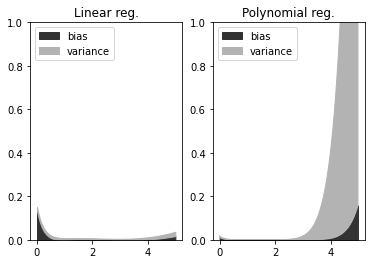

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import warnings


def f(x):
    return 1/(1+x)


def sample(n):
    x=np.random.random(n)*5
    y=f(x)
    return x,y


xx=np.arange(0,5,0.01)
np.random.seed(0)
y_poly_sum=np.zeros(len(xx))
y_poly_sum_sq=np.zeros(len(xx))
y_lin_sum=np.zeros(len(xx))
y_lin_sum_sq=np.zeros(len(xx))
y_true=f(xx)
n=1000
warnings.filterwarnings('ignore')
for _ in range(n):
    x,y=sample(5)
    poly=PolynomialRegression(4)
    poly.fit(x,y)
    lin=LinearRegression()
    lin.fit(x,y)
    y_poly=poly.predict(xx)
    y_poly_sum+=y_poly
    y_poly_sum_sq+=(y_poly-y_true)**2
    y_lin=lin.predict(xx.reshape(-1,1))
    y_lin_sum+=y_lin
    y_lin_sum_sq+=(y_lin-y_true)**2

fig=plt.figure()
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.set_title('Linear reg.')
ax2.set_title('Polynomial reg.')
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax1.fill_between(xx,0,(y_lin_sum/n-y_true)**2,color='0.2',label='bias')
ax1.fill_between(xx,(y_lin_sum/n-y_true)**2,y_lin_sum_sq/n,color='0.7',label='variance')
ax1.legend(loc='upper left')
ax2.fill_between(xx,0,(y_poly_sum/n-y_true)**2,color='0.2',label='bias')
ax2.fill_between(xx,(y_poly_sum/n-y_true)**2,y_poly_sum_sq/n,color='0.7',label='variance')
ax2.legend(loc='upper left')
plt.show()


バイアスが小さいのにバリアンスが大きいということは、平均を取ると真の曲線に当てはまっているが、大きく上に外したり大きく下に外したりすることも多いということ.

### 交差検証
過学習を防ぐ方法として交差検証（クロスバリデーション）がある.k分割交差検証とはデータをk個に分割（端数以外はほぼ等分）して、そのk個のデータのうち一つをテスト用にして他を訓練用にする.(3分割交差検証では学習と評価のプロセスを3回行うことになる)  
各回の学習と評価が終わるとそのモデルは捨てられ、次の回ではゼロから学習し直す.そうして得られた複数回の評価の平均を全体の評価値とすることが多い.

### ラッソ回帰
正則化項としてL1ノルムを加えるのがラッソ回帰.つまり次の関数を最小化するような$w$を求める.
$$
\varphi=\frac{1}{2}||\boldsymbol{y}-\boldsymbol{\tilde{X}w}||^2+\lambda|\boldsymbol{w}|_1
$$
ここで$|\cdot|_1$はL1ノルムと呼ばれ
$$
|w|_1=\sum_{i=1}^d|w_i|
$$
で定義される.  

ラッソ回帰の解を求めるアルゴリズムのひとつである座標降下法（coordinate descent）は、一般に$x\in \mathbb{R}^d$の関数$\psi(x)$を最小化（最大化）したいときに、$\frac{\partial \psi}{\partial x_j}=0\ (j=1,\cdots,d)$を同時に満たす$(x_1,x_2,\cdots,x_d)$を同時に求めるのは難しいので、適当な初期値からスタートして、$\frac{\partial \psi}{\partial x_1}=0$を満たす$x_1$の値で$x_1$を更新し、$\frac{\partial \psi}{\partial x_2}$を満たす$x_2$の値で$x_2$を更新し、といったように繰り返していく方法.より正確には以下のようになる.  
* 適当な初期値$x^{(0)}=(x_1^{(0)},x_2^{(0)},\cdots,x_d^{(0)})$
* $k=0$から$k$を1つずつ増やしながら収束するまで以下を繰り返す

    1. $\frac{\partial \psi}{\partial x_1}(x_1,x_2^{(k)},x_3^{(k)},\cdots,x_d^{(k)})=0$を満たすような$x_1$を求め、その値を$x_1^{(k+1)}$とする
    2. $\frac{\partial \psi}{\partial x_2}(x_1^{(k+1)},x_2,x_3^{(k)},\cdots,x_d^{(k)})=0$を満たすような$x_2$を求め、その値を$x_2^{(k+1)}$とする
  
    $\cdots$（以下同様に$x_3^{(k+1)}$から$x_d^{(k+1)}$までを求める）

ここで繰り返し部分の最初のステップで、$\frac{\partial \psi}{\partial x_1}(x_1,x_2^{(k)},x_3^{(k)},\cdots,x_d^{(k)})=0$となる$x_1$を求めているのは、$x_1$だけを動かして他の変数を固定して最小値をもとめていることになる.  
一般にすべての変数を動かしたときの$\nabla \psi=0$となる値を求めるのは難しいので、1つだけを動かして偏微分係数が0になるようにすることで、実際の最適解の近似になるであろうという考え方.$x_1,x_2,\cdots,x_d$を順番に同じ考え方で更新していく.  
しかし、ラッソ回帰の関数$\psi$は微分不可能なので、座標降下法を使うには工夫がいる.絶対値関数$f(x)=|x|$は$x=0$で尖った形をしていて微分不可能だが、ここでは右微分と左微分を考える.つまり、関数$f$の微分は
$$
\lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}
$$
で定義されるが、右微分、左微分はそれぞれこの微分の定義の$\lim_{h\rightarrow 0}$の部分を$\lim_{h\rightarrow +0}$、$\lim_{h\rightarrow -0}$で置き換えたもの.右微分、左微分をそれぞれ$d^+$、$d^-$で表すとして、絶対値関数$|x|$について右微分、左微分を求めてみる.
$$
\begin{eqnarray}
d^+(|x|)&=&\lim_{h\rightarrow+0}\frac{|x+h|-|x|}{h}=\lim_{h\rightarrow+0}\frac{(x+h)-x}{h}=1\\
d^-(|x|)&=&\lim_{h\rightarrow-0}\frac{|x+h|-|x|}{h}=\lim_{h\rightarrow-0}\frac{-(x+h)-(-x)}{h}=-1\\
\end{eqnarray}
$$
右微分、左微分と同じように右偏微分、左偏微分も定義できる.変数$w_j$による右偏微分を$\partial_{w_j}^+$、左偏微分を$\partial_{w_j}^-$と書くことにする.  
まずは$w_0$の計算が例外的なので、先に$w_0$を求める.
$$
\begin{eqnarray}
\frac{\partial \varphi}{\partial w_0}&=&-\sum_{i=1}^n\left(y_i-w_0-\sum_{j=1}^dx_{ij}w_j\right)\\
&=&-\sum_{i=1}^n\left(y_i-\sum_{j=1}^dx_{ij}w_j\right)+nw_0=0
\end{eqnarray}
$$
により
$$
w_0=\frac{1}{n}\sum_{i=1}^n\left(y_i-\sum_{j=1}^dx_{ij}w_j\right)\hspace{30pt}式①
$$
となる.次に$w_k\ (k\neq 0)$について右偏微分、左偏微分する.
$$
\begin{eqnarray}
\partial_{w_k}^+\varphi&=&-\sum_{i=1}^n\left(y_i-w_0-\sum_{j=1}^dx_{ij}w_j\right)x_{ik}+\lambda\\
\partial_{w_k}^-\varphi&=&-\sum_{i=1}^n\left(y_i-w_0-\sum_{j=1}^dx_{ij}w_j\right)x_{ik}-\lambda\\
\end{eqnarray}
$$
ここで$\partial_{w_k}^+\varphi=0$とおいて$w_k$について解き、その値を$w_k^+$とおく.
$$
w_k^+=\frac{\sum_{i=1}^n\left(y_i-w_0-\sum_{j\neq k}x_{ij}w_j\right)x_{ij}-\lambda}{\sum_{i=1}^nx_{ik}^2}
$$
同様に、ここで$\partial_{w_k}^-\varphi=0$とおいたときの値を$w_k^-$とおく.
$$
w_k^-=\frac{\sum_{i=1}^n\left(y_i-w_0-\sum_{j\neq k}x_{ij}w_j\right)x_{ij}+\lambda}{\sum_{i=1}^nx_{ik}^2}
$$
ここで、普通の座標降下法と同様に偏微分したものが0になるように変数の値を決める.いま$w_k$の値を更新しようとしているとすると、更新後の値の候補は$w_k^+$または$w_k^-$になる.$w_k^+$は$w_k>0$を、$w_k^-$は$w_k<0$を前提として計算なれたものなので、$w_k^+>0$ならば$w_k^+$に更新し、$w_k^-<0$ならば$w_k^-$に更新する.また$w_k^+>0$と$w_k^-<0$の両方を満たさないときは$w_k$の値は0のままで更新しない.

状況を整理して表すために、ここでソフトしきい値関数$S$を次のように定義する.
$$
S(p,q)={\rm sgn}(p)\max\{0,||p||-q\}
$$
ここで${\rm sgn}(\cdot)$は符号関数で次の式で定義される.
$$
{\rm sgn}(x)=
\left\{
\begin{array}{c}
-1\hspace{15pt}(x<0)\\
0\hspace{15pt}(x=0)\\
1\hspace{15pt}(x>0)
\end{array}
\right .
$$
更新後の$w_k$の値$\bar w_k$は次で表される.
$$
\bar w_k=\frac{S\left(\sum_{i=1}^n\left(y_i-w_0-\sum_{j\neq k}x_{ij}w_j\right)x_{ik},\lambda\right)}{\sum_{i=1}^nx_{ik}^2}\hspace{30pt}式05-09
$$
実際、$w_k^+>0$となる条件は
$$
\sum_{i=1}^n\left(y_i-w_0-\sum_{j\neq k}x_{ij}w_j\right)x_{ik}>\lambda
$$
$w_k^-<0$となる条件は
$$
\sum_{i=1}^n\left(y_i-w_0-\sum_{j\neq k}x_{ij}w_j\right)x_{ik}<\lambda
$$
であり、
$$
-\lambda\leq\sum_{i=1}^n\left(y_i-w_0-\sum_{j\neq k}x_{ij}w_j\right)x_{ik}\leq\lambda
$$
のときは$w_k^+\leq 0$かつ$w_k^-\geq 0$であり、
$$
\begin{align}
&S\left(\sum_{i=1}^n\left(y_i-w_0-\sum_{j\neq k}x_{ij}w_j\right)x_{ik},\ \lambda\right)\\
&=
\left\{
\begin{array}{l}
\sum_{i=1}^n\left(y_i-w_0-\sum_{j\neq k}x_{ij}w_j\right)x_{ik}-\lambda&(\sum_{i=1}^n\left(y_i-w_0-\sum_{j\neq k}x_{ij}w_j\right)x_{ik}>\lambda)\\
0&(-\lambda\leq \sum_{i=1}^n\left(y_i-w_0-\sum_{j\neq k}x_{ij}w_j\right)x_{ik}\leq \lambda)\\
\sum_{i=1}^n\left(y_i-w_0-\sum_{j\neq k}x_{ij}w_j\right)x_{ik}+\lambda&(\sum_{i=1}^n\left(y_i-w_0-\sum_{j\neq k}x_{ij}w_j\right)x_{ik}<-\lambda)
\end{array}    
\right .
\end{align}
$$
であるので、式05-09が確認できる.

ここでソフトしきい値関数の特徴を確認する.この関数は$x<-\lambda,\ \lambda<x$の範囲では線形となり、$-\lambda \leq x \leq\lambda$では0となる.  
元の$w_k$の更新の話に戻ると、$w_k$の値は0からスタートするので、ある一定の条件下では$w_k$は0のままとなり、その条件の外に出たときに非ゼロになることになる.実際ラッソ回帰の解は、ほとんどの要素が0になる.つまりラッソ回帰の解は疎になる傾向がある.

In [46]:
import numpy as np 


def soft_thresholding(x,y):
    return np.sign(x)*max(abs(x)-y,0)


class Lasso:
    def __init__(self,lambda_,tol=0.0001,max_iter=1000):
        self.lambda_=lambda_
        self.tol=tol    # 収束判定用のトレランス（許容度）
        self.max_iter=max_iter  # 最大繰り返し数
        self.w_=None


    def fit(self,X,t):
        n,d=X.shape # n:データ数、d:データの次元数
        self.w_=np.zeros(d+1)   # Xの各係数とバイアス
        avgl1=0.
        for _ in range(self.max_iter):
            avgl1_prev=avgl1
            self.update(n,d,X,t)
            avgl1=np.abs(self.w_).sum()/self.w_.shape[0]
            if abs(avgl1-avgl1_prev)<=self.tol:
                break


    def update(self,n,d,X,t):
        self.w_[0]=(t-np.dot(X,self.w_[1:])).sum()/n    # w0を求める式①
        w0vec=np.ones(n)*self.w_[0]
        for k in range(d):
            ww=self.w_[1:]  # 係数部分のみ取り出す
            ww[k]=0
            q=np.dot(t-w0vec-np.dot(X,ww),X[:,k])   # 式05-09のsign関数の中身
            r=np.dot(X[:,k],X[:,k]) # 式05-09の分母
            self.w_[k+1]=soft_thresholding(q/r,self.lambda_)

            # 式05-09のとおりに実装するとこうなるがlambda_のオーダーが大きくなる
            # self.w_[k+1]=soft_thresholding(q,self.lambda_)/r


    def predict(self,X):
        if X.ndim==1:
            X=X.reshape(X.shape[0],1)
        Xtil=np.c_[np.ones(X.shape[0]),X]
        return np.dot(Xtil,self.w_)

In [48]:
import numpy as np 
import pandas as pd 

df=pd.read_csv('winequality-red.csv',delimiter=';')
Xy=df.values.astype('float64')
np.random.seed(0)
np.random.shuffle(Xy)
train_X=Xy[:-1000,:-1]
train_y=Xy[:-1000,-1]
test_X=Xy[-1000:,:-1]
test_y=Xy[-1000:,-1]

for lambda_ in [1.,0.1,0.01]:
    model=Lasso(lambda_)
    model.fit(train_X,train_y)
    y=model.predict(test_X)
    print('--- lambda = {} ---'.format(lambda_))
    print('coefficients:')
    print(model.w_)
    mse=((y-test_y)**2).mean()
    print('MSE: {:.3f}'.format(mse))

--- lambda = 1.0 ---
coefficients:
[ 5.58430718  0.         -0.          0.          0.         -0.
  0.         -0.         -0.         -0.          0.          0.        ]
MSE: 0.691
--- lambda = 0.1 ---
coefficients:
[ 5.73493612  0.         -0.1407455   0.34369322 -0.         -2.00071813
  0.         -0.         -0.          0.          0.          0.        ]
MSE: 0.636
--- lambda = 0.01 ---
coefficients:
[ 5.71424724  0.         -1.01439751  0.00742223  0.         -3.34228417
  0.         -0.          0.          0.          1.04248618  0.        ]
MSE: 0.539


* wの値（出力のcoefficients）が疎になっているのが確認できる
* 全体に対するゼロ要素の割合をスパーシティと呼ぶ
* $\lambda$が大きいほどスパーシティが上がる

### 05-06 ロジスティック回帰

In [1]:
import numpy as np 
from scipy import linalg


THRESHMIN=1e-10


def sigmoid(x):
    return 1/(1+np.exp(-x))


class LogisticRegression:
    def __init__(self,tol=0.001,max_iter=3,random_seed=0):
        self.tol=tol    # 収束判定用の許容度
        self.max_iter=max_iter
        self.random_state=np.random.RandomState(random_seed)
        self.w_=None


    def fit(self,X,y):
        self.w_=self.random_state.randn(X.shape[1]+1)
        Xtil=np.c_[np.ones(X.shape[0]),X]   #Xチルダ：Xの最初の列にw0用の1を追加
        diff=np.inf
        w_prev=self.w_
        iter=0
        while diff>self.tol and iter<self.max_iter:
            yhat=sigmoid(np.dot(Xtil,self.w_))
            # np.clip()でしきい値(THRESHMIN)以下はしきい値とする
            r=np.clip(yhat*(1-yhat),THRESHMIN,np.inf)
            XR=Xtil.T*r
            XRX=np.dot(Xtil.T*r,Xtil)
            w_prev=self.w_
            b=np.dot(XR,np.dot(Xtil,self.w_)-1/r*(yhat-y))
            self.w_=linalg.solve(XRX,b)
            diff=abs(w_prev-self.w_).mean()
            iter+=1


    def predict(self,X):
        Xtil=np.c_[np.ones(X.shape[0]),X]
        yhat=sigmoid(np.dot(Xtil,self.w_))
        return np.where(yhat > .5,1,0)

In [6]:
import csv
import numpy as np 


n_test=100  # 評価用のデータ件数
X=[]
y=[]
with open("wdbc.data") as fp:
    for row in csv.reader(fp):
        if row[1]=="B":
            y.append(0)
        else:
            y.append(1)
        X.append(row[2:])

y=np.array(y,dtype=np.float64)
X=np.array(X,dtype=np.float64)
y_train=y[:-n_test]
X_train=X[:-n_test]
y_test=y[-n_test:]
X_test=X[-n_test:]
model=LogisticRegression(tol=0.01)
model.fit(X_train,y_train)

y_predict=model.predict(X_test)
n_hits=(y_test==y_predict).sum()
print("Accuracy: {}/{} = {}".format(n_hits,n_test,n_hits/n_test))

Accuracy: 97/100 = 0.97
<ipython-input-1-ce01e84c1a0e>:9: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


### 05-07 サポートベクターマシン
* マージンを最大化する直線により分類することを考える
* マージンの最大化とは、それぞれのクラスに属する点群のうち、直線に一番近い点と直線の距離を考え、その距離を最大にするもの